In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import math

import warnings
warnings.filterwarnings("ignore")

import sys
import seaborn as sns

!pip install imblearn

!pip install shap


In [2]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
# Checking for the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Checking for the number of rows and columns
df.shape

(6362620, 11)

## DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
#Defining a function to plot a bar chart
def plot_barchart(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [10]:
# Defining a function to plot the Percentage on bar chart
def plot_percentage(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  5 


Category	Value

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


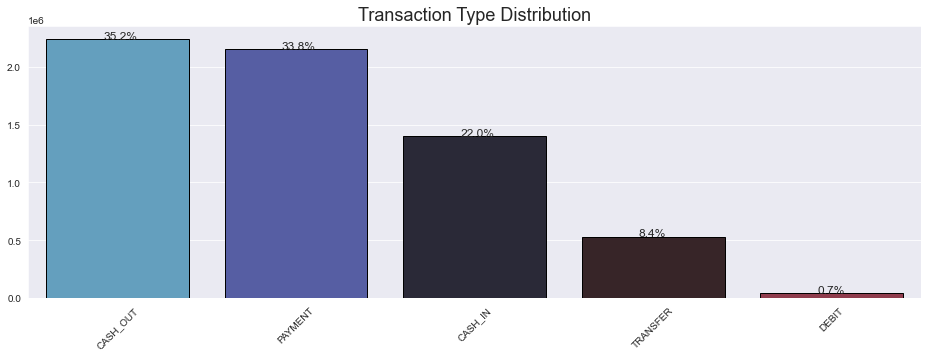

In [11]:
#To check for the distribution of the transaction type in the dataset
plot_percentage(df.type, "Transaction Type Distribution")

Total unique values are:  2 


Category	Value

0    6354407
1       8213
Name: isFraud, dtype: int64


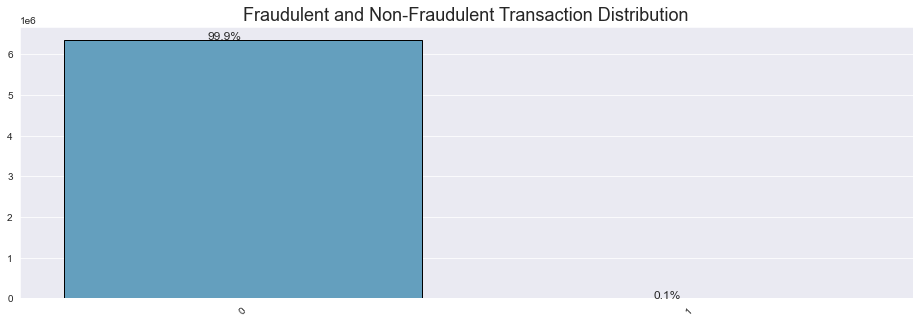

In [12]:
#To check for the distribution of the Fraudulent and Non-fraudulent transactions in the dataset
plot_percentage(df.isFraud, "Fraudulent and Non-Fraudulent Transaction Distribution")

In [13]:
# Checking for the first 10 rows and columns
df[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [14]:
# Use one-hot encoding to create binary columns for the 'type' column
df = pd.get_dummies(df, columns=['type'])

In [15]:
# Display the updated DataFrame with additional columns for each method
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [16]:
# Checking for the new number of columns
df.shape

(6362620, 15)

In [17]:
# Removing the 'C' prefixes from 'nameOrig columns
df['nameOrig'] = df['nameOrig'].str[1:]

In [18]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [19]:
# Separate rows starting with 'C' and 'M' in the "nameDest" column using one-hot encoding
df[['nameDest_C', 'nameDest_M']] = pd.get_dummies(df['nameDest'].str[0])

# Remove the prefix in front of the nameDest column
df['nameDest'] = df['nameDest'].str[1:]

# To display the updated DataFrame
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,0,1,0,0,1
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,0,1,0,0,1
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,0,1,1,0
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,0,1,0,0,0,1,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,0,1,0,0,1


In [20]:
# Comparing the isFraud and isFlaggedFraud columns to check for the accuracy of the isFlaggedFraud column
fraud_and_flagged_fraud_transactions = df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 1)]
fraud_and_not_flagged_fraud_transactions = df[(df["isFraud"] == 1) & (df["isFlaggedFraud"] == 0)]
wrong_flags = df[(df["isFraud"] == 0) & (df["isFlaggedFraud"] == 1)]

print("No. of fraud transactions: ", len(df[df["isFraud"] == 1]),
      "\nNo. of fraud transactions which were flagged fraud: ", len(fraud_and_flagged_fraud_transactions),
      "\nNo. of fraud transactions which were not flagged fraud: ", len(fraud_and_not_flagged_fraud_transactions),
      "\nNo. of genuine transactions which were falsely flagged fraud: ", len(wrong_flags))

No. of fraud transactions:  8213 
No. of fraud transactions which were flagged fraud:  16 
No. of fraud transactions which were not flagged fraud:  8197 
No. of genuine transactions which were falsely flagged fraud:  0


From the result gotten above, it shows that the "isFlaggedFraud" column doesn't accurately identify the Fraudulent transcations. We have about 8197 transactions that were not flagged as fraudulent and only 16 transactions that were identified as fraudulent. Due to this inaccuracy in effectively identifying whether a transcation is fraudulent or not, i would be dropping the "isFlaggedFraud" column.

In [21]:
# Dropping the "isFlaggedFraud" column from the DataFrame
df.drop("isFlaggedFraud", axis=1, inplace=True)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,1,0,0,1
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,1,0,0,1
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,1,1,0
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,1,0,0,0,1,0
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,1,0,0,1


### FEATURE ENGINEERING

Feature engineering involves creating new features, transforming existing ones, or selecting relevant features from your dataset to improve model performance.I would be creating a new feature called 'amount_to_balance_ratio'. The "amount_to_balance_ratio" new feature represents the ratio of the transaction amount to the account balance before the transaction. This feature could potentially capture patterns related to the proportion of the account balance that is being involved in a transaction, which might be useful for the predictive analysis and modelling.

In [22]:
# Create new feature: amount_to_balance_ratio
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1e-6)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameDest_C,nameDest_M,amount_to_balance_ratio
0,1,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0,0,0,1,0,0,1,0.057834
1,1,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0,0,0,1,0,0,1,0.087735
2,1,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0,0,0,0,1,1,0,1.000000
3,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0,1,0,0,0,1,0,1.000000
4,1,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0,0,0,1,0,0,1,0.280795


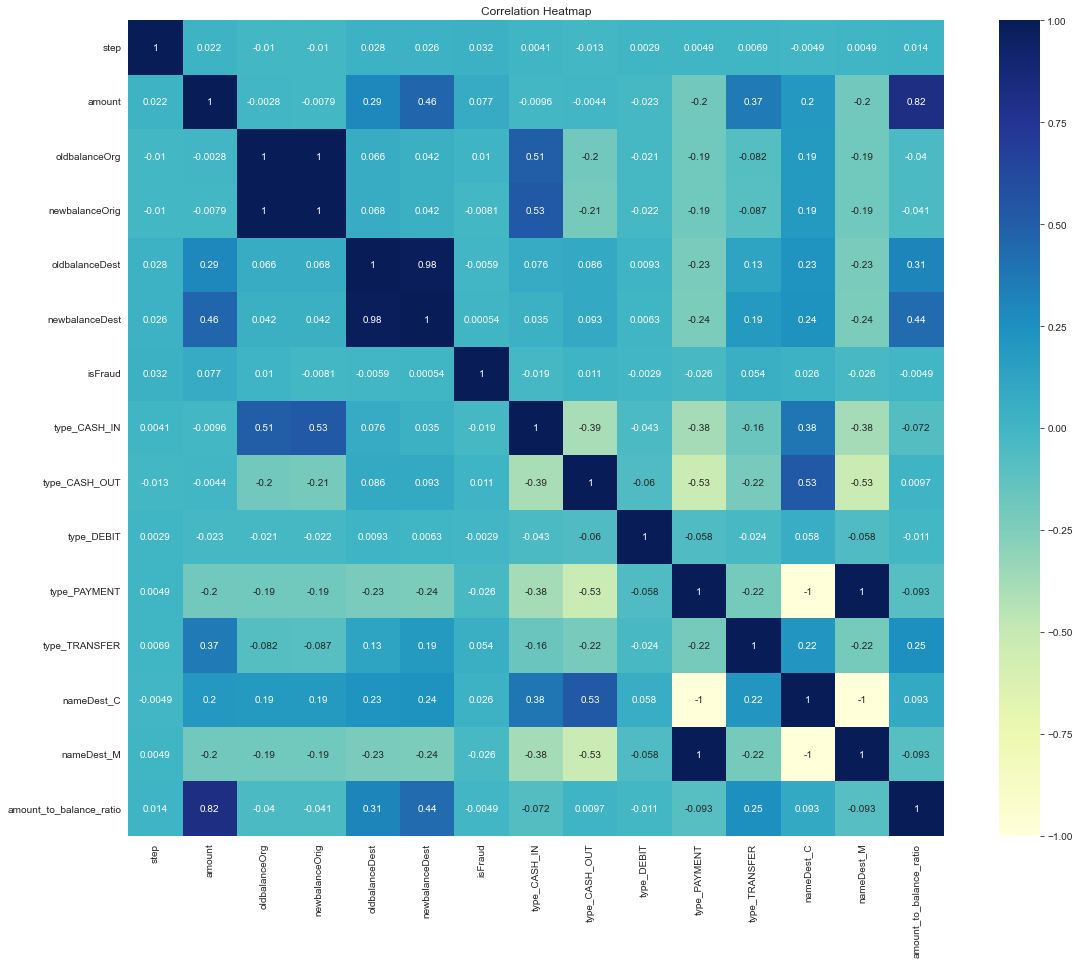

In [23]:
# Plotting a correlation plot using heatmap  to check for the correlation between the parameters
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, square=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

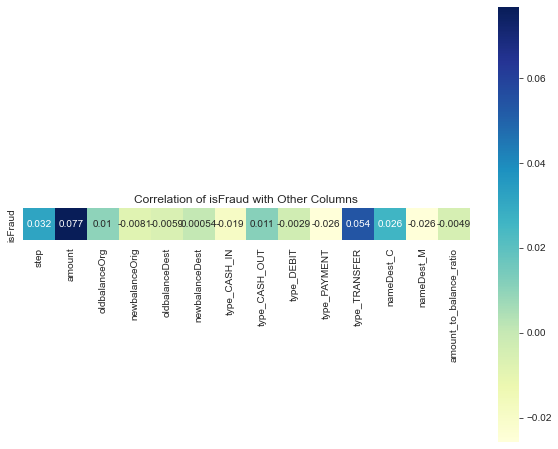

In [24]:
# Finding correlation of the isFraud column with other columns to see the relationship with other parameters

# Calculate the correlation matrix
corr = df.corr()

# Select only the correlations involving the "isFraud" column from the correlation matrix
fraud_corr = corr.loc["isFraud"]

# Plot the correlation heatmap for "isFraud" with other columns
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(fraud_corr).T.drop("isFraud", axis=1), annot=True, square=True, cmap='YlGnBu')
plt.title("Correlation of isFraud with Other Columns")
plt.show()

## Machine Learning Algorithm

In carrying out the modelling, several steps would be done to help improve and optimize the accuracy of the model. We would be Resampling the data, carrying out normalization (scaling) and using hyperparameter tuning to optimize the model parameters before finally feeding the data into the model.

In [25]:
# Creating a copy of the data
df1 = df.copy()
df2 = df.copy()

In [26]:
# Separate the parameter and target classes (i.e the label)
X = df.drop("isFraud", axis=1)  # Independent variables
y = df['isFraud']  # Dependent

### Normalization (Scaling)

Min-Max scaling, also known as normalization, is a data preprocessing technique that scales the features of a dataset to a specific range, typically between 0 and 1. This transformation can improve machine learning in several ways such as:

- Feature Scaling
- Faster Convergence
- Outlier Handling
- Interpretability
- Compatibility with Certain Algorithms
- Visualizations

Min-Max scaling can improve the performance and convergence of certain machine learning algorithms and is particularly useful when features have different scales or when using distance-based optimization techniques. 

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the features (independent variables)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Resampling the Data

Data imbalance is an important factor to consider in building a predictive model. From the result gotten from the EDA in the plot showing the Fraudulent and Non-fraudulent transcation distribution, it shows the large imbalance of the 0 and 1 classes in the "isFraud" column which is our target class . Therefore, handling this data imbalance would enable one to build a predictive model that performs well on all classes.

There are several methods that can be used to handle data imbalance however, we would be using 𝑅𝑒𝑠𝑎𝑚𝑝𝑙𝑖𝑛𝑔 for this project. There are two methods in resampling which is the Undersampling and the Oversampling. For this work, we would be using the Random Undersampler method for undersampling to handle the data imbalance.This is because in order to help maximize the computational power of my system, undersampling would be the best choice instead of oversampling and increasing the dataset which would slow down the system.

In [28]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Create the RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)


In [29]:
# Counting the number of instances in each class before and after resampling
print('isFraud distribution before resampling:')
print(y.value_counts())

print('isFraud distribution after resampling:')
print(pd.Series(y_resampled).value_counts())

isFraud distribution before resampling:
0    6354407
1       8213
Name: isFraud, dtype: int64
isFraud distribution after resampling:
0    8213
1    8213
Name: isFraud, dtype: int64


From the results gotten above, it shows that undersampling has been implemented on the 0 and 1 classes in the isFraud column representing the Fraudulent and Non-Fraudulent transactions giving an equal class distribution of 8213 for both class 0 and 1 as compared to the previous distribution of 6354407 in class 0 and 8213 in class 1. This would help to improve the accuracy of our machine learning model by not making it biased towards the class with more count.

### Data Splitting

In [30]:
# Spliting data into train and test data with the testing size as 20% and training size as 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
# To check for the first 3 X_train data
X_train[:3]

array([[5.12129380e-02, 2.58624181e-03, 7.66322348e-01, 6.78022533e-06,
        0.00000000e+00, 6.52184428e-01, 3.26823921e-03, 3.93799309e-03,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 6.40158862e-12],
       [3.43665768e-01, 8.83510666e-05, 8.73063484e-01, 1.86325291e-03,
        2.07430183e-03, 5.93925768e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.95797829e-16],
       [7.78975741e-01, 1.66652181e-02, 8.86812184e-01, 2.58558976e-02,
        0.00000000e+00, 9.49015598e-01, 2.19126034e-04, 4.54444474e-03,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.08171822e-14]])

## MACHINE LEARNING MODELS WITHOUT HYPERPARAMETER TUNING

### 1. LOGISTIC REGRESSION

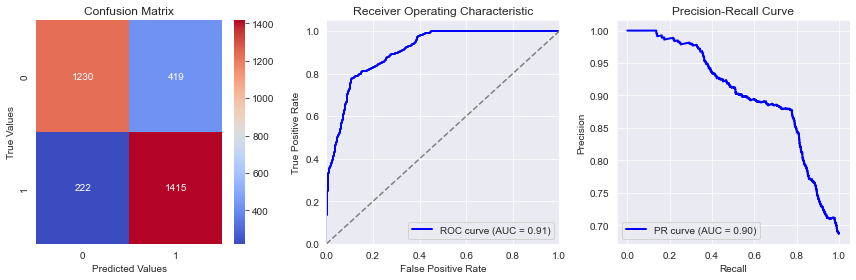

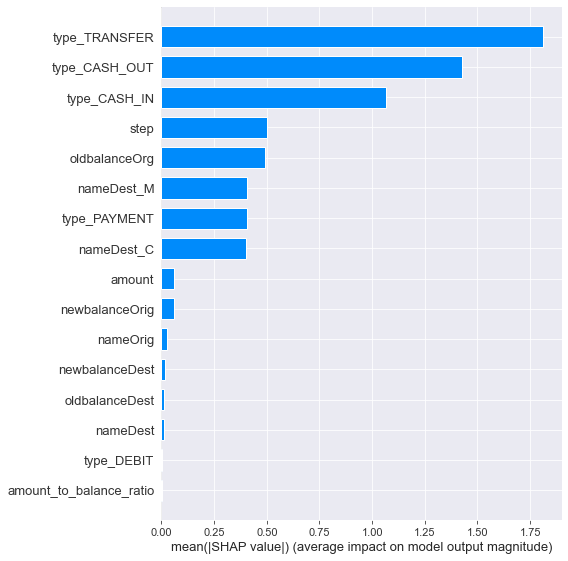

<Figure size 432x288 with 0 Axes>

Logistic Regression - Accuracy: 0.8049300060864273
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.79      1649
           1       0.77      0.86      0.82      1637

    accuracy                           0.80      3286
   macro avg       0.81      0.81      0.80      3286
weighted avg       0.81      0.80      0.80      3286

Logistic Regression - ROC AUC: 0.909096533209257
Logistic Regression - PR AUC: 0.9031558165493943


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(log_reg, X_train) 
shap_values = explainer(X_test)

# Evaluation metrics
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# ROC curve and AUC
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
pr_auc = auc(recall, precision)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_lr, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Apply tight layout
plt.tight_layout()


# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)  # Provide feature names here

# Apply tight layout again
plt.tight_layout()

# Show the plots
plt.show()

# Print the evaluation metrics
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - Classification Report:\n", classification_report_lr)
print("Logistic Regression - ROC AUC:", roc_auc)
print("Logistic Regression - PR AUC:", pr_auc)

### 2. RANDOM FOREST CLASSIFIERS (RFC)

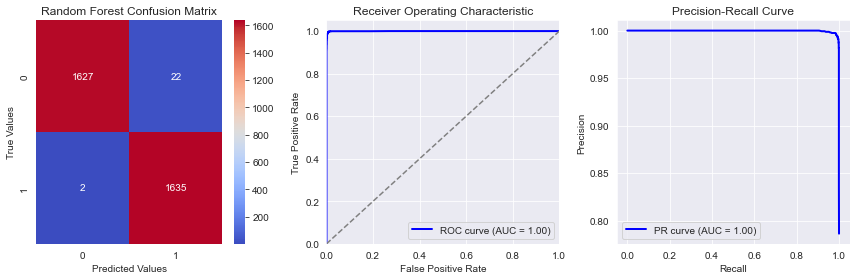

Random Forest - Accuracy: 0.992696287279367
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Random Forest - ROC AUC: 0.9996482568617696
Random Forest - PR AUC: 0.9996689713846952


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluation metrics
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC curve and AUC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Precision-Recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_rf, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Random Forest Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")


# Apply tight layout
plt.tight_layout()

# Plot SHAP summary plot 
#plt.figure(figsize=(8, 6))
#shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# Apply tight layout again
plt.tight_layout()

# Show the plots
plt.show()

# Print the evaluation metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Classification Report:\n", classification_report_rf)
print("Random Forest - ROC AUC:", roc_auc_rf)
print("Random Forest - PR AUC:", pr_auc_rf)


In [63]:
# Calculate SHAP values
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_test)


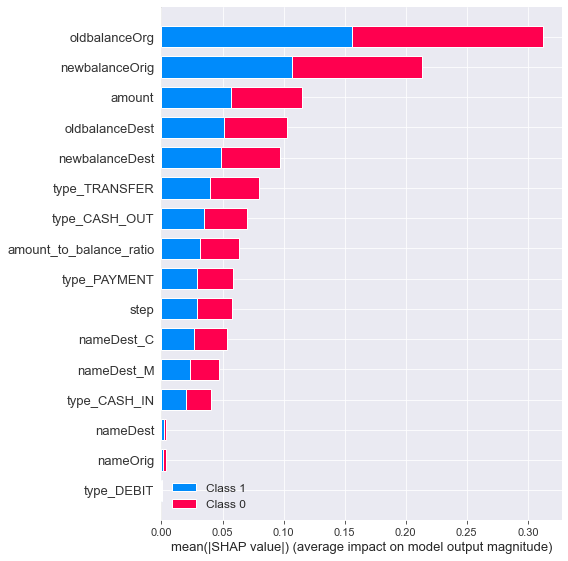

In [64]:
# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)  # Provide feature names here

### K-NEAREST NEIGHBORS (K-NN)

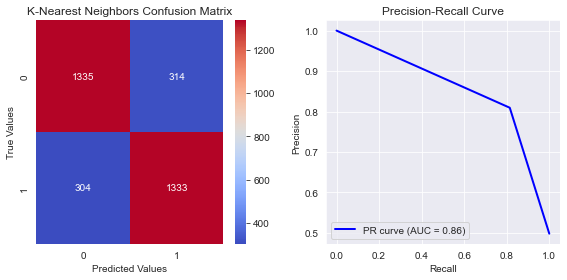

K-Nearest Neighbors - Accuracy: 0.8119293974437005
K-Nearest Neighbors - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1649
           1       0.81      0.81      0.81      1637

    accuracy                           0.81      3286
   macro avg       0.81      0.81      0.81      3286
weighted avg       0.81      0.81      0.81      3286

K-Nearest Neighbors - PR AUC: 0.8580792347262757


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluation metrics
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Precision-Recall curve and AUC
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_knn, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("K-Nearest Neighbors Confusion Matrix")

# Plot Precision-Recall curve
plt.subplot(132)
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_knn)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("K-Nearest Neighbors - Accuracy:", accuracy_knn)
print("K-Nearest Neighbors - Classification Report:\n", classification_report_knn)
print("K-Nearest Neighbors - PR AUC:", pr_auc_knn)


In [79]:
# Create a Kernel SHAP explainer
explainer = shap.KernelExplainer(knn.predict_proba, shap.sample(X_train, 2))

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

  0%|          | 0/3286 [00:00<?, ?it/s]

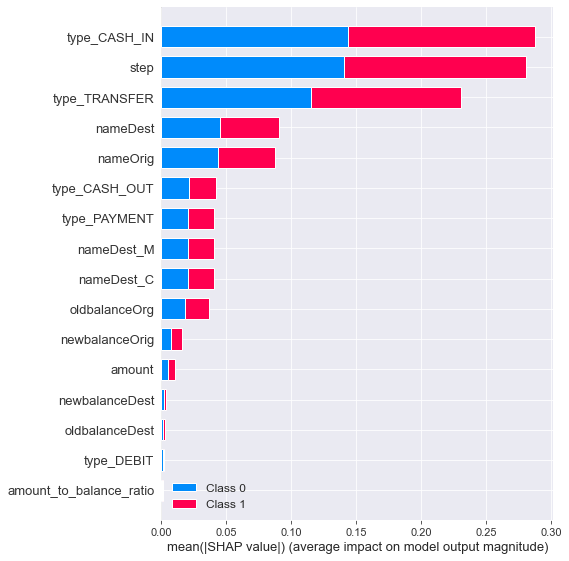

In [80]:
# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)  # Provide feature names here

### GRADIENT BOOSTING

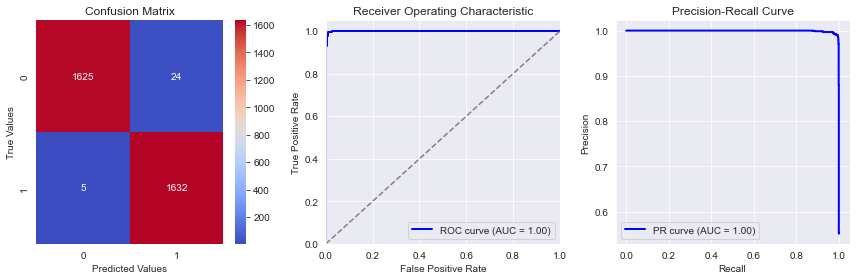

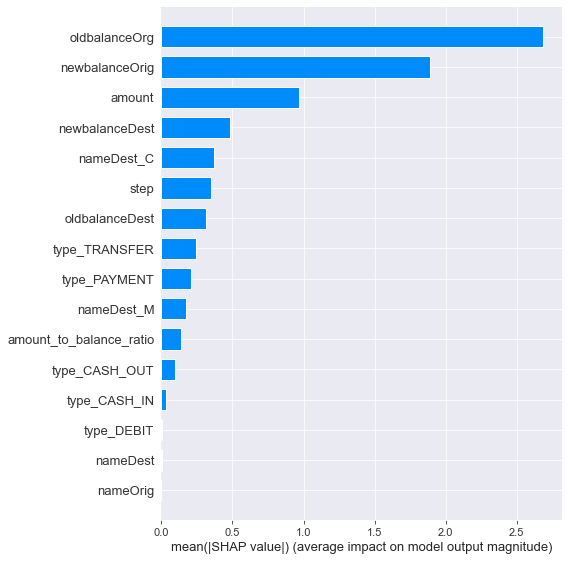

<Figure size 432x288 with 0 Axes>

Gradient Boosting - Accuracy: 0.9911746804625685
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Gradient Boosting - ROC AUC: 0.9989686646689483
Gradient Boosting - PR AUC: 0.9991809129865096


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

# Calculate SHAP values
explainer = shap.Explainer(gradient_boosting, X_train) 
shap_values = explainer(X_test)

# Evaluation metrics
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# ROC curve and AUC
y_prob_gb = gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
roc_auc = roc_auc_score(y_test, y_prob_gb)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob_gb)
pr_auc = auc(recall, precision)

# Plot confusion matrix
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(conf_matrix_gb, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix")

# Plot ROC curve
plt.subplot(132)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(133)
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Apply tight layout
plt.tight_layout()

# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)  # Provide feature names here

# Apply tight layout again
plt.tight_layout()

# Show the plots
plt.show()

# Print the evaluation metrics
print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - Classification Report:\n", classification_report_gb)
print("Gradient Boosting - ROC AUC:", roc_auc)
print("Gradient Boosting - PR AUC:", pr_auc)


### CARRYING OUT HYPERPARAMETER TUNING BEFORE TRAINING THE MODELS

### 1. LOGISTIC REGRESSION

In [49]:
# Define the assessment function
def assess_with_shap(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # To make predictions from the model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test, y_predict)}")
    

    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")  # Use 'fmt' parameter to format values as decimals
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()


    # ROC curve and PR curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    
    # Plot ROC curve and PR curve
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    print("ROC AUC:", roc_auc)
    
    # Calculate SHAP values
    explainer = shap.Explainer(model, X_train) 
    shap_values = explainer(X_test)
    
    # Plot SHAP summary plot with larger figure size
    plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)
    plt.tight_layout()
    plt.show()

    

In [45]:
# Using GridSearchCV to carryout the hyperparameter tuning for logistic regression  parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1],
    "max_iter": [100, 200],
    "solver": ["liblinear","lbfgs"]
}

grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3)

# fit the grid search object to the training data
grid.fit(X_train, y_train)

# print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
  Accuracy:  0.8983257229832572
  F1-score:  0.9175269780788688

Results:
Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.7865296803652968 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} 
Accuracy: 0.7789954337899543 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'} 
Accuracy: 0.7759512937595129 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'} 
Accuracy: 0.7862252663622528 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l1', 'solver': 'lbfgs'} 
Accuracy: nan 
F1-score: 0.9175269780788688

Params: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 

In [46]:
# To feed the training data to the model.
model = LogisticRegression(C=1, max_iter=200, penalty="l1", solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')

The Training Accuracy of the Model is 0.91324200913242
The Testing Accuracy of the Model is 0.9175289105295191
The Model classification report is               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1649
           1       0.92      0.91      0.92      1637

    accuracy                           0.92      3286
   macro avg       0.92      0.92      0.92      3286
weighted avg       0.92      0.92      0.92      3286



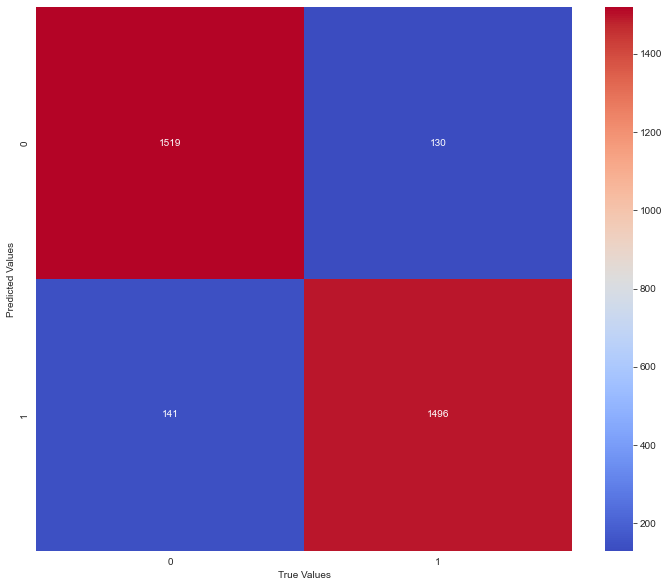

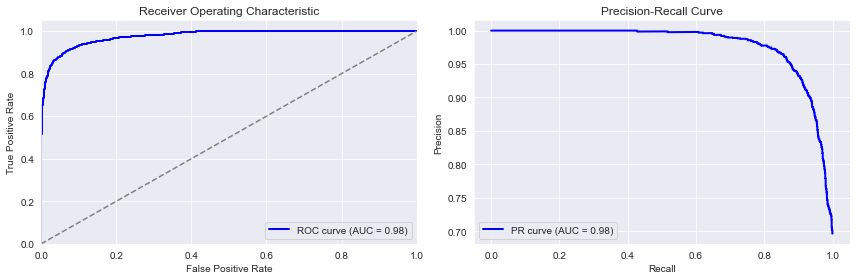

ROC AUC: 0.9770876112695612


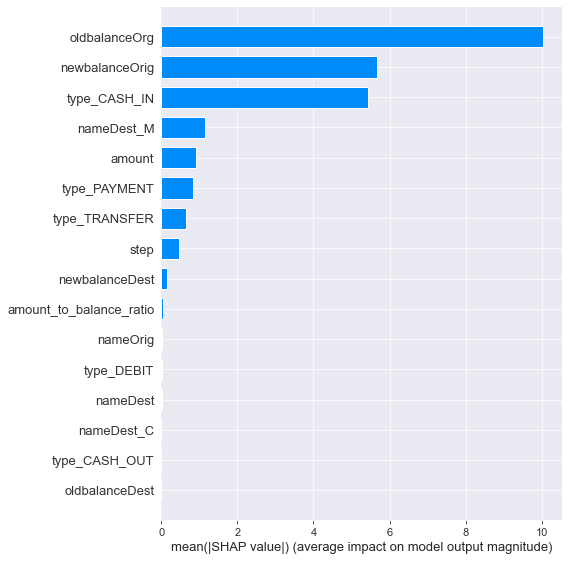

<Figure size 432x288 with 0 Axes>

In [50]:
# Evaluating the model performance on the test set
assess_with_shap(model)

### 2. RANDOM FOREST CLASSIFIERS (RFC)

In [71]:
# Define the assessment function
def assess_rf(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # To make predictions from the model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test, y_predict)}")
    

    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")  # Use 'fmt' parameter to format values as decimals
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()


    # ROC curve and PR curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    
    # Plot ROC curve and PR curve
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    print("ROC AUC:", roc_auc)
    
    plt.show()

In [69]:
# Using GridSearchCV to carryout the hyperparameter tuning for RFC parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(rfc, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
  Accuracy:  0.9891933028919331
  F1-score:  0.9930005535435527

Results:
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 
Accuracy: 0.9891171993911719 
F1-score: 0.9930005535435527

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 
Accuracy: 0.9891171993911719 
F1-score: 0.9930005535435527

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50} 
Accuracy: 0.9883561643835618 
F1-score: 0.9930005535435527

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} 
Accuracy: 0.9888888888888889 
F1-score: 0.9930005535435527

Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 
Accuracy: 0.9889649923896499 
F1-score: 0.9930005535435527

Params: {'max_depth': None, 'min_sa

In [73]:
# To feed the training data to the model.
model_rfc = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

The Training Accuracy of the Model is 1.0
The Testing Accuracy of the Model is 0.9920876445526476
The Model classification report is               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



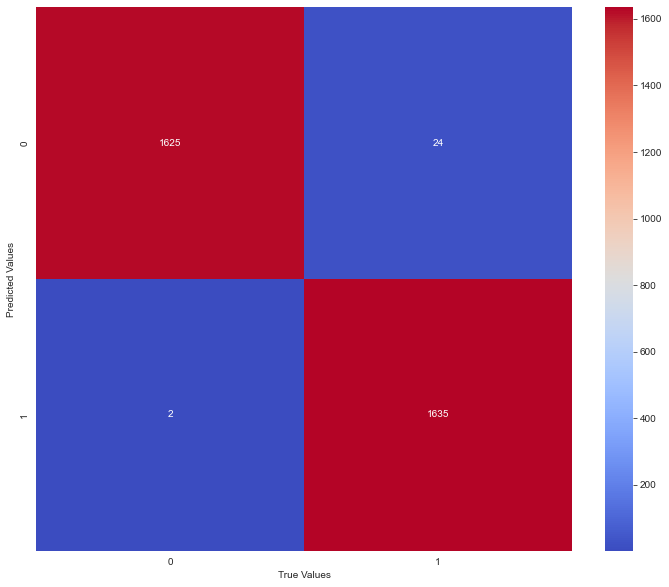

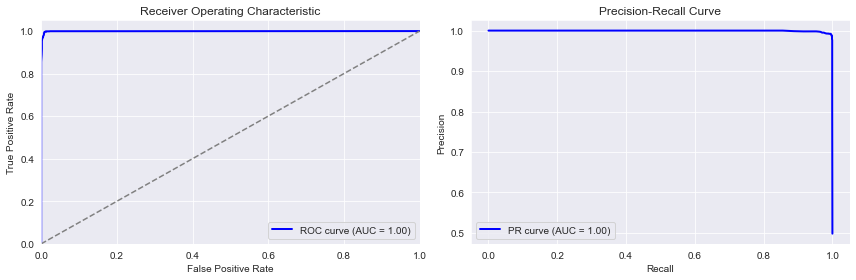

ROC AUC: 0.9992311291380757


In [74]:
# Evaluating the model performance on the test set
assess_rf(model_rfc)

In [75]:
# Calculate SHAP values
explainer = shap.Explainer(model_rfc)
shap_values = explainer.shap_values(X_test)

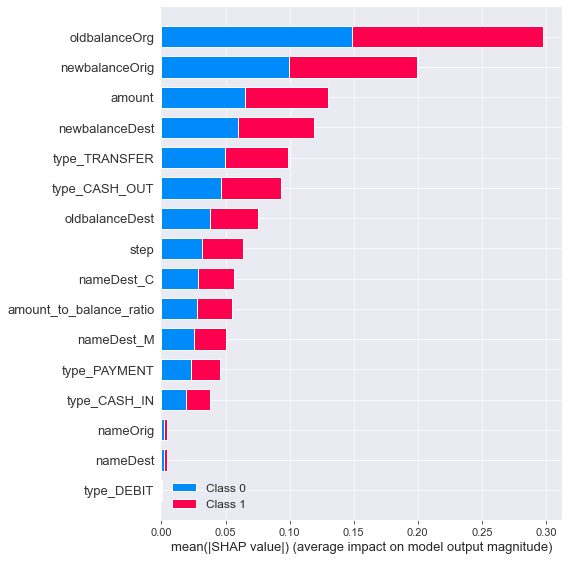

In [76]:
# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns) 

### 3. K-NEAREST NEIGHBORS (K-NN)

In [81]:
# Defining a function to evaluate the model
def assess_knn(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report    
    # To make predictions from model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test,y_predict)}")
    
     # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")  # Use 'fmt' parameter to format values as decimals
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Precision-recall curve
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_predict)
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    print("PR AUC:", metrics.auc(recall, precision))

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid to search
params = {
    "n_neighbors": [3, 5],
    "p": [1, 2],
}

# Create a K-Nearest Neighbors classifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(knn, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'n_neighbors': 5, 'p': 1}
  Accuracy:  0.8357686453576864
  F1-score:  0.8274476615463368

Results:
Params: {'n_neighbors': 3, 'p': 1} 
Accuracy: 0.830213089802131 
F1-score: 0.8274476615463368

Params: {'n_neighbors': 3, 'p': 2} 
Accuracy: 0.8166666666666668 
F1-score: 0.8274476615463368

Params: {'n_neighbors': 5, 'p': 2} 
Accuracy: 0.8213089802130898 
F1-score: 0.8274476615463368



In [83]:
# To feed the training data to the model.
model_knn = KNeighborsClassifier(n_neighbors=5, p=1)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(p=1)

The Training Accuracy of the Model is 0.8921613394216134
The Testing Accuracy of the Model is 0.8274497869750457
The Model classification report is               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1649
           1       0.83      0.82      0.83      1637

    accuracy                           0.83      3286
   macro avg       0.83      0.83      0.83      3286
weighted avg       0.83      0.83      0.83      3286



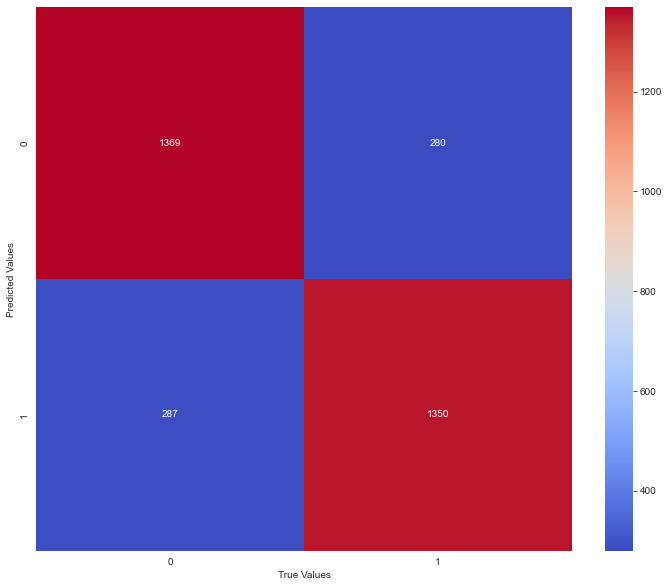

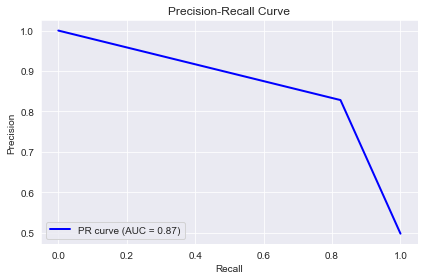

PR AUC: 0.8701201907833124


In [84]:
# Evaluating the model performance on the test set
assess_knn(model_knn)

In [86]:
# Create a Kernel SHAP explainer
explainer = shap.KernelExplainer(model_knn.predict_proba, shap.sample(X_train, 2))

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

  0%|          | 0/3286 [00:00<?, ?it/s]

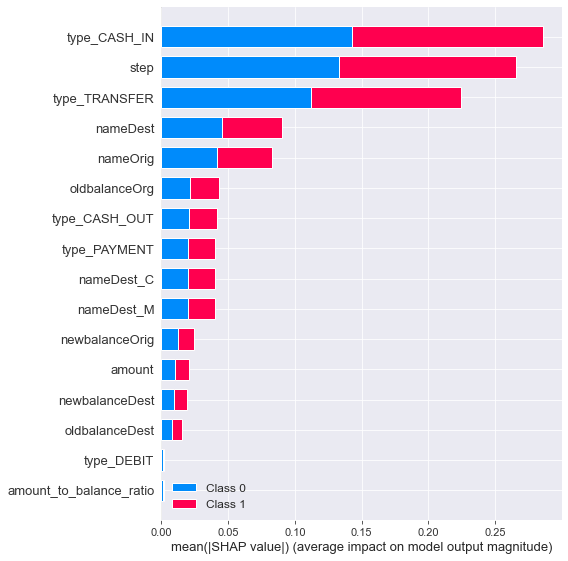

In [87]:
# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns) 

### 2. GRADIENT BOOSTING

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid to search
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
}

# Create a Gradient Boosting classifier object
gb = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object to search for the best parameters
grid = GridSearchCV(gb, params, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and its result
best_params = grid.best_params_
best_score = grid.cv_results_['mean_test_score'][grid.best_index_]
print("* Best parameters: ", best_params)
print("  Accuracy: ", best_score)
print("  F1-score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))

# Print the accuracy and F1-score for each parameter combination
print("\nResults:")
for i, score in enumerate(grid.cv_results_['mean_test_score']):
    if grid.cv_results_['params'][i] == best_params:
        continue
    print(f"Params: {grid.cv_results_['params'][i]} \nAccuracy: {score} \nF1-score: {f1_score(y_test, grid.predict(X_test), average='weighted')}\n")


* Best parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
  Accuracy:  0.9930745814307458
  F1-score:  0.9948265152623705

Results:
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50} 
Accuracy: 0.9589802130898021 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} 
Accuracy: 0.9616438356164384 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} 
Accuracy: 0.9757229832572297 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50} 
Accuracy: 0.9766362252663622 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100} 
Accuracy: 0.9840182648401826 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200} 
Accuracy: 0.9831811263318113 
F1-score: 0.9948265152623705

Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50} 

In [53]:
# To feed the training data to the model.
best_gb = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], max_depth=best_params['max_depth'], random_state=42)
best_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           random_state=42)

In [65]:
# Define the assessment function
def assess_gb(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    # To make predictions from the model
    y_predict = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_predict)
    
    # Printing all results
    print(f"The Training Accuracy of the Model is {model.score(X_train, y_train)}")
    print(f"The Testing Accuracy of the Model is {model.score(X_test, y_test)}")
    print(f"The Model classification report is {classification_report(y_test, y_predict)}")
    

    # Plotting confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")  # Use 'fmt' parameter to format values as decimals
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()


    # ROC curve and PR curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_prob)
    
    # Plot ROC curve and PR curve
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(122)
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % metrics.auc(recall, precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    # Print the evaluation metrics
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    print("ROC AUC:", roc_auc)
    
    plt.show()

The Training Accuracy of the Model is 1.0
The Testing Accuracy of the Model is 0.994826536822885
The Model classification report is               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



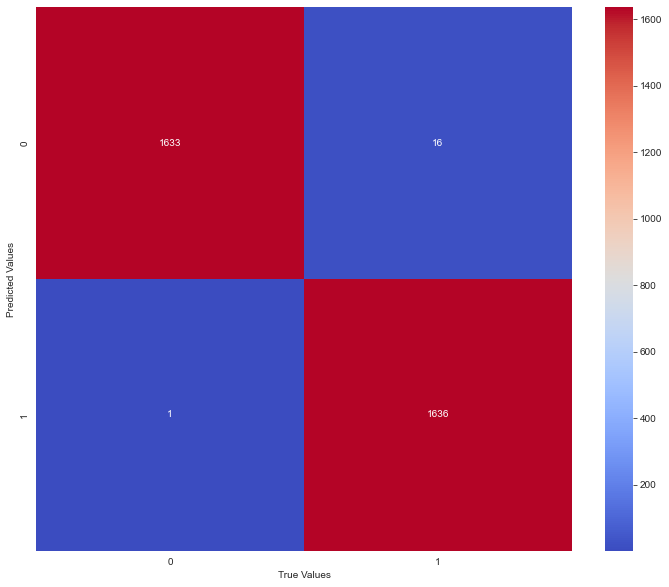

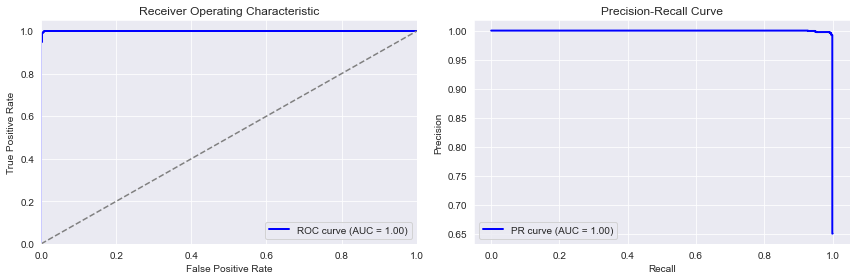

ROC AUC: 0.9995169320144787


In [66]:
# Evaluating the model performance on the test set
assess_gb(best_gb)

In [67]:
# Calculate SHAP values
explainer = shap.Explainer(best_gb)
shap_values = explainer.shap_values(X_test)

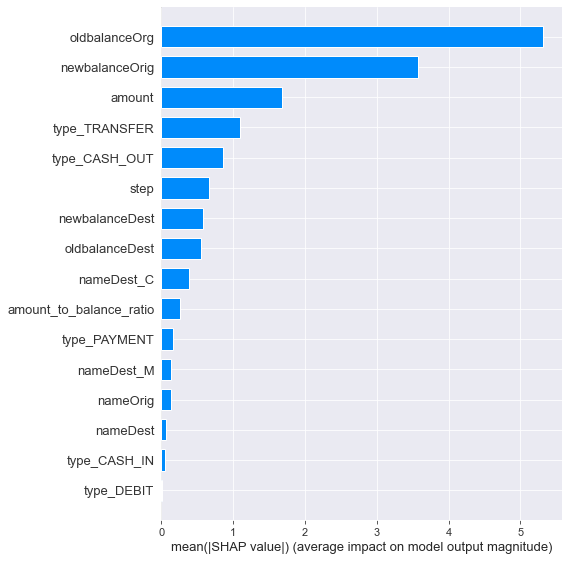

In [68]:
# Plot SHAP summary plot with larger figure size
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)  